** Final project code **

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pygsp as pg
import matplotlib.pyplot as plt

In [3]:
from load_and_preprocessing import load_data_and_filter_members, assign_party_to_names
from visualization import label_to_numeric, get_lap_eigendecomp

In [4]:
# Use load_data_and_filter_members to create adjacency for any file from any legislature
# Example 
adjacency, node_index, sum_na_per_row = load_data_and_filter_members('../data/abdb-de-all-affairs-50-0_new.csv',
                                                                     filter_method='number_NA',cutoff=10,ret_transf=False)

(Nbr. of councillors, nbr. of votes) before filter: (434, 1320)
(Nbr. of councillors, nbr. of votes) after filter: (179, 1316)


Assigning parties to the councillors from the dataset loaded above:

In [5]:
name_with_party = assign_party_to_names('../data/Ratsmitglieder_1848_FR.csv', node_index)
print(name_with_party)

         Counc_Id                  CouncillorName PartyAbbreviation
node_id                                                            
0            3907            Thorens Goumaz Adèle               PES
1            3923                       Marra Ada               PSS
2            3897            Moser Tiana Angelina               pvl
3            3902                  Rickli Natalie               UDC
4            3875     Eichenberger-Walther Corina               PLR
5            3876                Estermann Yvette               UDC
6            3877                     Fiala Doris               PRD
7            3878           Flückiger-Bäni Sylvia               UDC
8            3880      Geissbühler Andrea Martina               UDC
9            1346                  Moret Isabelle               PRD
10           3830        Carobbio Guscetti Marina               PSS
11           1129                 Schenker Silvia               PSS
12           1288                    Amherd Viol

Translating the party label into a numerical value:

In [6]:
# Example here is with parties, but the same function works for any kind of dictionary, eg. lobbying mandates
party_map = {'UDC': 1,'PSS': -1,'PDC':0.5,'BastA':-1,'PLR':1,'pvl':-0.5,
             'PES':-0.5, 'PBD':0.5, 'PdT':1, 'CSPO':-0.5, 'PLS':1,
             'PRD':0.5, 'MCR':-0.5, 'PEV':-0.5, 'Lega':1, 'csp-ow':-0.5 }

name_with_party_num, labels_in_data = label_to_numeric(name_with_party, 'PartyAbbreviation', party_map, ret_values=True)

This can be used to see if the label dictionary needs to be adjusted:

In [7]:
print("Unique label values found in data: \n{0}".format(labels_in_data))
print("Label values that are translated by provided dictionary: \n{0}".format(party_map.keys()))

Unique label values found in data: 
['PES' 'PSS' 'pvl' 'UDC' 'PLR' 'PRD' 'PDC' 'PLS' 'PBD' 'PEV' 'Lega'
 'csp-ow' 'MCR' 'BastA' 'PdT']
Label values that are translated by provided dictionary: 
dict_keys(['UDC', 'PSS', 'PDC', 'BastA', 'PLR', 'pvl', 'PES', 'PBD', 'PdT', 'CSPO', 'PLS', 'PRD', 'MCR', 'PEV', 'Lega', 'csp-ow'])


Draw some eigenmaps and plot party membership as signal:

Text(0.5, 1.0, 'Position on political spectrum by party ')

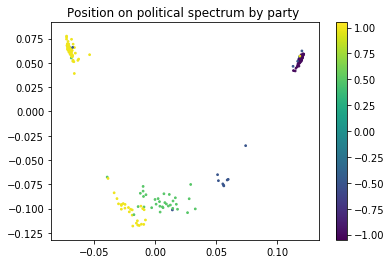

In [11]:
graph_pygsp = pg.graphs.Graph(adjacency)
eigenvectors = get_lap_eigendecomp(adjacency, lap_type='normalized', ret_eigval=False)
signal = name_with_party_num['PartyAbbreviation'].values
graph_pygsp.set_coordinates(eigenvectors[:, 1:3])  # Laplacian eigenmaps.
graph_pygsp.plot_signal(signal, vertex_size=3)
plt.title('Position on political spectrum by party ')